In [1]:
import numpy as np
import pandas as pd
import statistics as st
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Generate 2 random test data group

In [2]:
np.random.seed=101
n = 100

In [3]:
# H0
a = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
# H1
b = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [47]:
# a = np.random.randint(low=0, high=10, size=n)
# b = np.random.randint(low=0, high=10, size=n)

In [48]:
# a = np.random.normal(loc=10, scale=0.2, size=n)
# b = np.random.normal(loc=10, scale=0.1, size=n)

In [4]:
print(a)
print(a.shape)

print()

print(b)
print(b.shape)


[23 21 19 24 35 17 18 24 33 27 21 23]
(12,)

[31 28 19 24 32 27 16 41 23 32 29 33]
(12,)


In [50]:
# rng = np.random.Generator(np.random.PCG64())
# rng = np.random.default_rng()

# a = rng.standard_normal(n)
# b = rng.standard_normal(n)


In [51]:
# a = np.random.normal(0.0, 0.1, 10000)
# b = np.random.normal(0.06, 0.1, 10000)

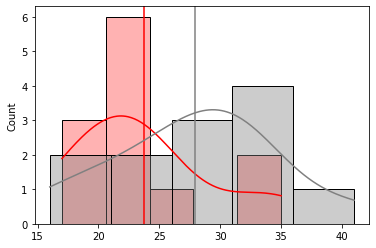

In [5]:
sns.histplot(a, kde=True, color='red',alpha=0.3)
plt.axvline(np.mean(a), color='red')

sns.histplot(b, kde=True, color='gray', alpha=0.4)
plt.axvline(np.mean(b), color='gray')



In [6]:
print(f"mean a: {np.mean(a):.3f}, mean b: {np.mean(b):.3f}")
print(f"median a: {np.median(a):.3f}, median b: {np.median(b):.3f}")
print(f"mode a: {st.mode(a):.3f},  mode b: {st.mode(b):.3f}")

mean a: 23.750, mean b: 27.917
median a: 23.000, median b: 28.500
mode a: 23.000,  mode b: 32.000


### check the mean diffrentiation of 2 groups

In [7]:
mean_dif = np.mean(b) - np.mean(a)
mean_dif

4.166666666666668

## Test

In [55]:
a_1 = np.array([np.zeros(len(a)), a])
b_1 = np.array([np.ones(len(b)), b])

In [16]:
result = np.append(a_1, b_1, axis=1)
result_t = result.T
# result_t

-----------------
## Determine if the means differ significantly

In [17]:
# Shuffle results rows
np.random.shuffle(result_t)
# result_t

In [18]:
# Generate experiment labels to fully randomize groups
experiment_labels = np.random.randint(0, 2, len(result_t))
experiment_labels

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0])

In [20]:
# Allocate random labels to experiment data values
# so neither 0 does not indicate group A nor 1 for Group B

experiment_data = np.array([experiment_labels, result_t[:, 1]])
experiment_data_t = experiment_data.T
# experiment_data_t

In [21]:
# Now separate shuffeled 0 and 1 group
new_a = experiment_data_t[experiment_data_t[:, 0] == 0][:, 1]
new_a

array([7., 6., 7., 5., 3., 3., 1., 5., 2., 9., 1., 5., 1., 0., 1., 1., 4.,
       4., 2., 9., 0., 1., 0., 7., 3., 1., 8., 4., 8., 1., 0., 6., 5., 0.,
       6., 7., 2., 6., 5., 3., 9., 1., 3., 2., 3., 6., 8., 0., 1., 3., 5.,
       8., 8., 3., 3., 6., 4., 3., 3., 1., 0., 9., 6., 8., 3., 1., 4., 6.,
       5., 7., 1., 1., 0., 2., 0., 9., 6., 5., 6., 6., 2., 5., 1., 4., 9.,
       4., 3., 5., 3., 5., 4., 9., 2., 9., 0., 1., 5., 4., 5., 0., 3., 8.,
       5., 5., 0.])

In [22]:
new_b = experiment_data_t[experiment_data_t[:, 0] == 1][:, 1]
new_b

array([4., 9., 8., 9., 0., 7., 7., 5., 2., 3., 6., 7., 2., 9., 6., 7., 4.,
       7., 3., 1., 4., 6., 2., 8., 0., 0., 9., 9., 8., 7., 0., 8., 9., 0.,
       9., 4., 0., 0., 9., 7., 5., 0., 3., 0., 9., 4., 3., 1., 4., 5., 6.,
       4., 1., 7., 2., 0., 4., 7., 2., 7., 9., 2., 5., 7., 5., 7., 4., 8.,
       9., 3., 9., 2., 5., 7., 8., 8., 7., 9., 2., 4., 6., 7., 4., 8., 6.,
       5., 0., 3., 8., 8., 5., 0., 5., 9., 3.])

In [23]:
print(new_a.mean())
print(new_b.mean())

3.9523809523809526
5.010526315789473


### p-value

In [24]:
# Now calculat p-value
new_sets_mean_diff = new_b.mean() - new_a.mean()
print(new_sets_mean_diff)

1.0581453634085207


## Repeate more times

In [8]:
def ab_test(R): # reapet times
    
    raw_data = np.append(a,b)
    
    
    # generate an empty array in shape (T, 1)
    experiment_diff_mean = np.empty([R, 1])
    
    for times in np.arange(R):
        
        # randomize labels
        experiment_labels = np.random.randint(0, 2, len(raw_data))

        # randomize groups data
        np.random.shuffle(raw_data)
        
        experiment_data = np.array([experiment_labels, raw_data]).T
        
        new_a = experiment_data[experiment_data[:, 0] == 0][:, 1]
#         print(new_a)
#         print(np.mean(new_a))
        
        new_b = experiment_data[experiment_data[:, 0] == 1][:, 1]
#         print(new_b)
#         print(np.mean(new_b))
        
        experiment_diff_mean[times] = new_b.mean() - new_a.mean()
#         print(experiment_diff_mean[times])
#         print('=' * 100)
    
    return experiment_diff_mean
        

In [9]:
test_times = 1000
test_result = ab_test(test_times)

## P-Value Thresholding

In [10]:
# test_result

In [11]:
# How many values are more than mean dif
len(test_result[test_result >= mean_dif])

70

## Chance quata

In [13]:
chance_ratio = (len(test_result[test_result >= mean_dif]) / test_times) * 100
chance_ratio

7.000000000000001

## Ratio to show the test is true significant

In [14]:
100 - chance_ratio

93.0

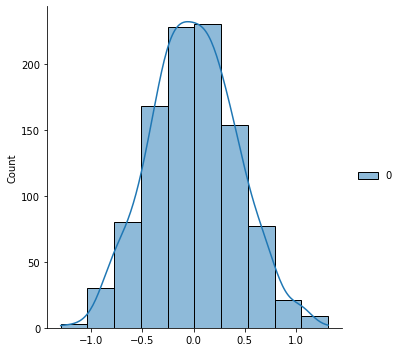

In [82]:
# Test Mean diff histogram
sns.displot(test_result, bins=10, kde=True)